In [ ]:
!pip install pyknon

In [ ]:
from pyknon.genmidi import Midi
from pyknon.music import NoteSeq, Note, Rest
from music21 import *

In [ ]:
# 로컬PC에서 midi파일 연결
# 여러곡을 한번에 넣을 수 있음.
from google.colab import files

uploaded = files.upload()
file_name =[]
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  file_name.append(fn)

Saving maple_free_market.mid to maple_free_market (6).mid
Saving ongdalsam.mid to ongdalsam (5).mid
Saving original_song.mid to original_song.mid
User uploaded file "maple_free_market.mid" with length 604 bytes
User uploaded file "ongdalsam.mid" with length 9185 bytes
User uploaded file "original_song.mid" with length 271 bytes


In [ ]:
print(file_name)

['maple_free_market.mid', 'ongdalsam.mid', 'original_song.mid']


In [ ]:
original_scores_list= []
for i in range(len(file_name)):
    file = "{}".format(file_name[i])
    original_score = converter.parse(file).chordify()
    original_scores_list.append(original_score)

In [ ]:
#노트 리스트를 midi파일로 변환해주는 함수

def make_midi(midi_path, notes, bpm=120):
    note_names = 'c c# d d# e f f# g g# a a# b'.split()

    result = NoteSeq()
    for n in notes:
        duration = 1. / n[1]

        if n[0].lower() == 'r':
            result.append(Rest(dur=duration))
        else:
            pitch = n[0][:-1]
            octave = int(n[0][-1]) + 1
            pitch_number = note_names.index(pitch.lower())
            
            result.append(Note(pitch_number, octave=octave, dur=duration))
            
    midi = Midi(number_tracks=1, tempo=bpm)
    midi.seq_notes(result, track=0)
    midi.write(midi_path)

In [ ]:
# from music21 import chord, note

In [ ]:
#midi파일에서 데이터 추출
notes = []
durations = []

for element in original_score.flat:
    
    if isinstance(element, chord.Chord):
        # notes.append('.'.join(n.nameWithOctave for n in element.pitches)) #원본 함수를  ↓처럼 변환 - 원본함수에서는 pitches를 여러개 받아옴
        notes.append(element.pitches[len(element.pitches) -1].nameWithOctave) #마지막 인덱스 음만 받아오기--> 마지막 인덱스가 같은 악기라는 보장이 없어서 전혀 다른 곡을 생성할 수 있음.
        #원곡 전처리가 잘 안됨
        durations.append(element.duration.quarterLength)

    if isinstance(element, note.Note):
        if element.isRest: #쉼표처리
            notes.append(str(element.name))
            durations.append(element.duration.quarterLength)

        else:
            notes.append(str(element.nameWithOctave))
            durations.append(element.duration.quarterLength)

In [ ]:
#midi파일에서 데이터 추출
notes = []
durations = []

for score in original_scores_list:
    for element in score.flat:
        
        if isinstance(element, chord.Chord):
            # notes.append('.'.join(n.nameWithOctave for n in element.pitches)) #원본 함수를  ↓처럼 변환 - 원본함수에서는 pitches를 여러개 받아옴
            notes.append(element.pitches[len(element.pitches) -1].nameWithOctave) #마지막 인덱스 음만 받아오기--> 마지막 인덱스가 같은 악기라는 보장이 없어서 전혀 다른 곡을 생성할 수 있음.
            #원곡 전처리가 잘 안됨
            durations.append(element.duration.quarterLength)

        if isinstance(element, note.Note):
            if element.isRest: #쉼표처리
                notes.append(str(element.name))
                durations.append(element.duration.quarterLength)

            else:
                notes.append(str(element.nameWithOctave))
                durations.append(element.duration.quarterLength)

In [ ]:
# 음계 추출 단

print('\npitch','duration')
for n,d in zip(notes,durations):
    print(n, '\t', d)


pitch duration
A5 	 0.75
G#5 	 0.25
A5 	 0.5
B5 	 0.75
A5 	 0.25
B5 	 0.5
C#6 	 0.75
A5 	 0.25
B5 	 0.5
C#6 	 0.5
D6 	 1.0
C#6 	 0.5
A5 	 0.5
A5 	 0.75
B5 	 0.25
C#6 	 0.5
B5 	 0.75
G#5 	 0.25
A5 	 2.0
A5 	 0.75
G#5 	 0.25
A5 	 0.5
B5 	 0.75
A5 	 0.25
B5 	 0.5
C#6 	 0.75
A5 	 0.25
B5 	 0.5
C#6 	 0.5
D6 	 0.5
F#6 	 0.5
E6 	 0.5
E6 	 0.75
D6 	 0.25
C#6 	 0.5
D6 	 0.75
F#6 	 0.25
E6 	 1.0
F#6 	 0.5
F#6 	 0.5
E6 	 1.0
D6 	 0.5
C#6 	 0.5
D6 	 0.5
E6 	 1.0
F#6 	 0.5
F#6 	 0.5
A6 	 1.0
F#6 	 0.5
E6 	 1.0
F#6 	 0.5
F#6 	 0.5
E6 	 1.0
D6 	 0.5
C#6 	 0.5
D6 	 0.5
E6 	 1.0
B4 	 0.5
D5 	 0.5
G5 	 0.5
D5 	 1/6
B4 	 1/3
D5 	 1/3
D5 	 1/3
D5 	 1/3
C5 	 1.0
G5 	 2/3
E5 	 1/3
G5 	 2/3
E5 	 1/3
D5 	 0.5
F#5 	 0.5
A5 	 0.5
C6 	 1/6
C6 	 1/3
B5 	 0.5
A5 	 1/6
A5 	 1/3
G5 	 0.25
B4 	 1/12
B4 	 1/6
B4 	 1/12
B4 	 1/12
B4 	 1/12
B4 	 1/6
B4 	 1/12
A5 	 0.25
G5 	 1/12
A5 	 1/6
G5 	 1/12
G5 	 1/12
A5 	 1/12
A5 	 1/6
G5 	 1/12
A5 	 0.25
G5 	 1/12
A5 	 1/6
G5 	 1/12
G5 	 1/12
A5 	 1/12
A5 	 1/6
G5 	 1/12
B4 	 0

In [ ]:
#위에서 추출한 노트들에서 중복을 제거합니다.(인덱싱을 위함)
notes_list2set = set(notes)
unique_notes_list = list(notes_list2set)

#0~노트 수 만큼 들어있는 리스트
indexing_list =[i for i in range(len(unique_notes_list))]
indexing_list 

#박자 전처리
converted_durations =[]
for item in durations :
    #  converted_durations.append(int(4**(1/item))) - 함수화 실패
    if  2.5 <= item :
        converted_durations.append(1)
    elif  1.6 <= item and item <2.5 :
        converted_durations.append(2)
    elif  0.8 <= item and item <1.6 :
        converted_durations.append(4)
    elif  0.6 <= item and item <0.8 :
        converted_durations.append(6)
    elif  0.3<= item and item < 0.6 :
        converted_durations.append(8)
    elif item and item < 0.3 :
        converted_durations.append(16)
    # elif 0.15<= item and item < 0.3 :
    #     converted_durations.append(16)
    # elif item < 0.15 :
    #     converted_durations.append(32) 
      
# print(converted_durations)

#박자들의 중복을 제거해줍니다.
durations_list2set = set(converted_durations)
unique_durations_list = list(durations_list2set)

code2idx ={}
temp_list =[]

#노트와 박자 조합의 경우의 수를 모두 인덱싱 해줍니다.
temp_index_list = [i for i in range(len(unique_notes_list)*len(unique_durations_list))]
for note in unique_notes_list :
    for duration in unique_durations_list :
        #딕셔너리의 경우 리스트를 키값으로 받지 못하기 때문에 _로 임시로 합쳐줍니다.
        temp_list.append(str(note) +"_"+str(duration))

# print(temp_index_list)
# print(temp_list)
code2idx = dict(zip(temp_list, temp_index_list))
################################

idx2code ={}
#딕셔너리의 키와 밸류값을 바꿔줍니다. 바꿔줄 떄 '_'로 구분했던 것을 원상복귀해줍니다.
for k,v in code2idx.items() :
    k = k.split("_")
    k = [k[0],int(k[1])]
    idx2code[v] = k
idx2code

#전처리를 통해 얻은 악보리스트 -> 완전 똑같이 받지 못함. 이유는 midi파일에서 제공하는 pitch가 여러개임. 
song = []
for j in range(len(notes)) :
    song.append([notes[j],converted_durations[j]])

In [ ]:
song

[['A5', 6],
 ['G#5', 16],
 ['A5', 8],
 ['B5', 6],
 ['A5', 16],
 ['B5', 8],
 ['C#6', 6],
 ['A5', 16],
 ['B5', 8],
 ['C#6', 8],
 ['D6', 4],
 ['C#6', 8],
 ['A5', 8],
 ['A5', 6],
 ['B5', 16],
 ['C#6', 8],
 ['B5', 6],
 ['G#5', 16],
 ['A5', 2],
 ['A5', 6],
 ['G#5', 16],
 ['A5', 8],
 ['B5', 6],
 ['A5', 16],
 ['B5', 8],
 ['C#6', 6],
 ['A5', 16],
 ['B5', 8],
 ['C#6', 8],
 ['D6', 8],
 ['F#6', 8],
 ['E6', 8],
 ['E6', 6],
 ['D6', 16],
 ['C#6', 8],
 ['D6', 6],
 ['F#6', 16],
 ['E6', 4],
 ['F#6', 8],
 ['F#6', 8],
 ['E6', 4],
 ['D6', 8],
 ['C#6', 8],
 ['D6', 8],
 ['E6', 4],
 ['F#6', 8],
 ['F#6', 8],
 ['A6', 4],
 ['F#6', 8],
 ['E6', 4],
 ['F#6', 8],
 ['F#6', 8],
 ['E6', 4],
 ['D6', 8],
 ['C#6', 8],
 ['D6', 8],
 ['E6', 4],
 ['B4', 8],
 ['D5', 8],
 ['G5', 8],
 ['D5', 16],
 ['B4', 8],
 ['D5', 8],
 ['D5', 8],
 ['D5', 8],
 ['C5', 4],
 ['G5', 6],
 ['E5', 8],
 ['G5', 6],
 ['E5', 8],
 ['D5', 8],
 ['F#5', 8],
 ['A5', 8],
 ['C6', 16],
 ['C6', 8],
 ['B5', 8],
 ['A5', 16],
 ['A5', 8],
 ['G5', 16],
 ['B4', 16],
 ['

In [ ]:
code2idx

{'A4_16': 69,
 'A4_2': 65,
 'A4_4': 66,
 'A4_6': 67,
 'A4_8': 68,
 'A5_16': 99,
 'A5_2': 95,
 'A5_4': 96,
 'A5_6': 97,
 'A5_8': 98,
 'A6_16': 39,
 'A6_2': 35,
 'A6_4': 36,
 'A6_6': 37,
 'A6_8': 38,
 'B4_16': 49,
 'B4_2': 45,
 'B4_4': 46,
 'B4_6': 47,
 'B4_8': 48,
 'B5_16': 59,
 'B5_2': 55,
 'B5_4': 56,
 'B5_6': 57,
 'B5_8': 58,
 'C#6_16': 94,
 'C#6_2': 90,
 'C#6_4': 91,
 'C#6_6': 92,
 'C#6_8': 93,
 'C4_16': 89,
 'C4_2': 85,
 'C4_4': 86,
 'C4_6': 87,
 'C4_8': 88,
 'C5_16': 19,
 'C5_2': 15,
 'C5_4': 16,
 'C5_6': 17,
 'C5_8': 18,
 'C6_16': 84,
 'C6_2': 80,
 'C6_4': 81,
 'C6_6': 82,
 'C6_8': 83,
 'D4_16': 44,
 'D4_2': 40,
 'D4_4': 41,
 'D4_6': 42,
 'D4_8': 43,
 'D5_16': 14,
 'D5_2': 10,
 'D5_4': 11,
 'D5_6': 12,
 'D5_8': 13,
 'D6_16': 104,
 'D6_2': 100,
 'D6_4': 101,
 'D6_6': 102,
 'D6_8': 103,
 'E4_16': 34,
 'E4_2': 30,
 'E4_4': 31,
 'E4_6': 32,
 'E4_8': 33,
 'E5_16': 24,
 'E5_2': 20,
 'E5_4': 21,
 'E5_6': 22,
 'E5_8': 23,
 'E6_16': 4,
 'E6_2': 0,
 'E6_4': 1,
 'E6_6': 2,
 'E6_8': 3,
 'F#5

In [ ]:
idx2code

{0: ['E6', 2],
 1: ['E6', 4],
 2: ['E6', 6],
 3: ['E6', 8],
 4: ['E6', 16],
 5: ['G5', 2],
 6: ['G5', 4],
 7: ['G5', 6],
 8: ['G5', 8],
 9: ['G5', 16],
 10: ['D5', 2],
 11: ['D5', 4],
 12: ['D5', 6],
 13: ['D5', 8],
 14: ['D5', 16],
 15: ['C5', 2],
 16: ['C5', 4],
 17: ['C5', 6],
 18: ['C5', 8],
 19: ['C5', 16],
 20: ['E5', 2],
 21: ['E5', 4],
 22: ['E5', 6],
 23: ['E5', 8],
 24: ['E5', 16],
 25: ['G#5', 2],
 26: ['G#5', 4],
 27: ['G#5', 6],
 28: ['G#5', 8],
 29: ['G#5', 16],
 30: ['E4', 2],
 31: ['E4', 4],
 32: ['E4', 6],
 33: ['E4', 8],
 34: ['E4', 16],
 35: ['A6', 2],
 36: ['A6', 4],
 37: ['A6', 6],
 38: ['A6', 8],
 39: ['A6', 16],
 40: ['D4', 2],
 41: ['D4', 4],
 42: ['D4', 6],
 43: ['D4', 8],
 44: ['D4', 16],
 45: ['B4', 2],
 46: ['B4', 4],
 47: ['B4', 6],
 48: ['B4', 8],
 49: ['B4', 16],
 50: ['G4', 2],
 51: ['G4', 4],
 52: ['G4', 6],
 53: ['G4', 8],
 54: ['G4', 16],
 55: ['B5', 2],
 56: ['B5', 4],
 57: ['B5', 6],
 58: ['B5', 8],
 59: ['B5', 16],
 60: ['F#6', 2],
 61: ['F#6', 4],

In [ ]:
#오류 시 midi폴더를 생성해주어야합니다.
midipath = 'midi/{}'.format(file)
make_midi(midi_path= midipath, notes=song)
print(file)

original_song.mid


midi파일 재생 사이트

https://onlinesequencer.net/

In [ ]:
# 목표 : 첫 4개 음표를 입력하면 나머지를 연주할 수 있는 모델을 만드는 것이 목표

# 0. 사용할 패키지 불러오기
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np
import pandas as pd

# 랜덤시드 고정시키기
np.random.seed(5)

# 데이터셋 생성 함수        
def seq2dataset(seq, window_size):    # 아래에서 지정할 윈도우 크기만큼 자르는 함수
    dataset = []
    for i in range(len(seq)-window_size):    # 만약 seq 30 - 4 : 26 범위이면, 0~25 
        subset = seq[i:(i+window_size+1)]    # seq i:~ i+window_size+1 만큼 해서 dataset에 넣어준다. //input 값 5개씩 계속 갱신
        dataset.append([code2idx[str(item[0])+"_"+str(item[1])] for item in subset])

    return np.array(dataset)

In [ ]:
# 2. 데이터셋 생성하기 seq2dataset() 함수를 하여 dataset를 생성. 데이터셋은 앞서 정의한 사전에 따라 숫자로 변환되어 생성.
dataset = seq2dataset(song, window_size = 2) # 윈도우 사이즈 4 + 타겟 1 이므로 5임.

print(dataset.shape)
print(dataset)


(374, 5)
[[97 29 98 57 99]
 [29 98 57 99 58]
 [98 57 99 58 92]
 ...
 [88 88 51 73 31]
 [88 51 73 31 43]
 [51 73 31 43 88]]


예측 과정
1) 한 스텝 단위 예측 
2) 곡 전체 예측입니다.

1) 한 스텝 예측
한 스텝 예측이란 실제 음표 4개를 입력하여 다음 음표 1개를 예측하는 것을 반복하는 것. 

2) 곡 전체 예측
입력된 초기 4개 음표만을 입력으로 곡 전체를 예측. 만약 중간에 틀린 부분이 생긴다면, 이후 음정, 박자는 모두 이상하게 될 가능성 존재.

-> 처음 윈도우사이즈(4개)만 사용해서 다음 5번째 음정을 예측, 그리고 슬라이딩 윈도우 사용해서 결국엔 예측값들만으로 다음 음정을 예측하는 방법.



In [ ]:
# 1~4번째 음표를 데이터로 5번째 음표를 라벨값으로 학습. 끝까지 이렇게 반복.


# 입력(X)과 출력(Y) 변수로 분리하기
mlp_x_train = dataset[:,0:2]   #  학습필요.  행 : 전체, 로우 : 0,1,2,3 가져옴. 
mlp_y_train = dataset[:,2]     #  학습필요   행 : 전체, 로우 : 4번째 만 가져옴.


In [ ]:
print(mlp_x_train)
print(mlp_y_train)

[[97 29 98 57]
 [29 98 57 99]
 [98 57 99 58]
 ...
 [88 88 51 73]
 [88 51 73 31]
 [51 73 31 43]]
[ 99  58  92  99  58  93 101  93  98  97  59  93  57  29  95  97  29  98
  57  99  58  92  99  58  93 103  63   3   2 104  93 102  64   1  63  63
   1 103  93 103   1  63  63  36  63   1  63  63   1 103  93 103   1  48
  13   8  14  48  13  13  13  16   7  23   7  23  13  78  98  84  83  58
  99  98   9  49  49  49  49  49  49  49  99   9  99   9   9  99  99   9
  99   9  99   9   9  99  99   9  48  48  13  13  12  13  51   7   9   6
  68  68  98  99  98  98  98  46  12  14  11  48  48  13  13  13  13  51
   7   9   6  68  68  98  99  98  98  98  46  11  13  13   6  56 102 104
  81  83  58  98  98  11  98  98  82  84  56  58  98   8   8  48  13   8
  13  13  12  16   7   8   6  13  78  98  84  83  58  98   9  49  49  49
  49  49  49  49  99   9  99   9   9  99  99   9  99   9  99   9   9  99
  99   9  48  13   8  14  48  13  13  13  16   7  23   7  23  13  78  98
  84  83  58  99  98   9  49

In [ ]:

max_idx_value = len(idx2code)  
# # 1. 데이터 준비하기. 나온 것들 하나씩 Unique 하게 나열.
# 코드 사전 정의
print(len(idx2code))

# 입력값 정규화 시키기
mlp_x_train = mlp_x_train / float(max_idx_value)   

# y값에 대한 라벨값에 대한 one-hot 인코딩 수행 이유 : 구분되야 하는 값(종류)이 3개가 넘어가므로 원핫인코딩 해줌..
mlp_y_train = np_utils.to_categorical(mlp_y_train)

one_hot_vec_size = mlp_y_train.shape[1]  

print("one hot encoding vector size is ", one_hot_vec_size)

105
one hot encoding vector size is  105


In [ ]:
mlp_y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [ ]:
print(float(max_idx_value))

105.0


In [ ]:
print(mlp_x_train)

[[0.92380952 0.27619048 0.93333333 0.54285714]
 [0.27619048 0.93333333 0.54285714 0.94285714]
 [0.93333333 0.54285714 0.94285714 0.55238095]
 ...
 [0.83809524 0.83809524 0.48571429 0.6952381 ]
 [0.83809524 0.48571429 0.6952381  0.2952381 ]
 [0.48571429 0.6952381  0.2952381  0.40952381]]


# 다층 퍼셉트론 모델

#입력 속성이 4개(윈도우사이즈) 이고 출력이 11개(one_hot_vec_size=11)

In [ ]:
# 3. 모델 구성하기
model = Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))  # 인풋, 윈도우 사이즈만큼 4개로)
# dropout = 0.3 #dropout은 과적합 -> 트레인셋을 최대한 외워서 예측하기 위해 임의로 빼주었습니다. 
model.add(Dense(128, activation='relu'))
# dropout = 0.3
model.add(Dense(one_hot_vec_size, activation='softmax'))

In [ ]:
# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#history = LossHistory() # 손실 이력 객체 생성  #위에 # 손실 이력 클래스 정의 사용.
#history.init()

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               1280      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 105)               13545     
Total params: 47,721
Trainable params: 47,721
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.weights

#shape(4,256) -> 한개에서 768개.  X -> 히든레이어로
#Shape (256, ) -> 바이어스
#shape(256, 128) -> 레이어에서 레이어로
#Shape (128, ) -> 바이어스
#shape (128, 11) -> 히든레이어에서 y로(출력 레이어)
#shape(11, ) -> 히든에서 y로 넘어올 때 보이는 바이어스

[<tf.Variable 'dense_14/kernel:0' shape=(4, 256) dtype=float32, numpy=
 array([[-0.05988216, -0.0787246 , -0.09186528, ..., -0.06772595,
          0.00770757,  0.05262694],
        [-0.0721544 , -0.10560834,  0.07162152, ...,  0.09992278,
          0.08049868, -0.10708663],
        [ 0.1497193 , -0.01146105,  0.1343812 , ...,  0.00783555,
          0.05882053, -0.14719853],
        [-0.00967106, -0.08525441,  0.07433942, ..., -0.14869815,
         -0.06877349,  0.0263969 ]], dtype=float32)>,
 <tf.Variable 'dense_14/bias:0' shape=(256,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [ ]:
print(mlp_x_train)
print(mlp_y_train)

[[0.92380952 0.27619048 0.93333333 0.54285714]
 [0.27619048 0.93333333 0.54285714 0.94285714]
 [0.93333333 0.54285714 0.94285714 0.55238095]
 ...
 [0.83809524 0.83809524 0.48571429 0.6952381 ]
 [0.83809524 0.48571429 0.6952381  0.2952381 ]
 [0.48571429 0.6952381  0.2952381  0.40952381]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# 5. 모델 학습시키기
history = model.fit(mlp_x_train, mlp_y_train, epochs=300, batch_size=10, verbose=1, validation_split=0.2)

Train on 299 samples, validate on 75 samples
Epoch 1/300
299/299 [==============================] - 0s 572us/step - loss: 4.4479 - accuracy: 0.0602 - val_loss: 4.3418 - val_accuracy: 0.1200
Epoch 2/300
299/299 [==============================] - 0s 196us/step - loss: 3.5682 - accuracy: 0.1304 - val_loss: 4.6972 - val_accuracy: 0.0933
Epoch 3/300
299/299 [==============================] - 0s 199us/step - loss: 3.2339 - accuracy: 0.1438 - val_loss: 4.7745 - val_accuracy: 0.1467
Epoch 4/300
299/299 [==============================] - 0s 184us/step - loss: 3.1201 - accuracy: 0.2107 - val_loss: 5.0201 - val_accuracy: 0.1467
Epoch 5/300
299/299 [==============================] - 0s 184us/step - loss: 3.0364 - accuracy: 0.2341 - val_loss: 5.0526 - val_accuracy: 0.1867
Epoch 6/300
299/299 [==============================] - 0s 192us/step - loss: 2.9307 - accuracy: 0.2308 - val_loss: 5.1180 - val_accuracy: 0.1467
Epoch 7/300
299/299 [==============================] - 0s 189us/step - loss: 2.8352 -

In [ ]:
# 6. 모델 평가하기
scores = model.evaluate(mlp_x_train, mlp_y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))


374/374 [==============================] - 0s 47us/step
accuracy: 74.60%


In [ ]:
window_size = 2
pred_count = len(song)- window_size # 최대 예측 개수 정의

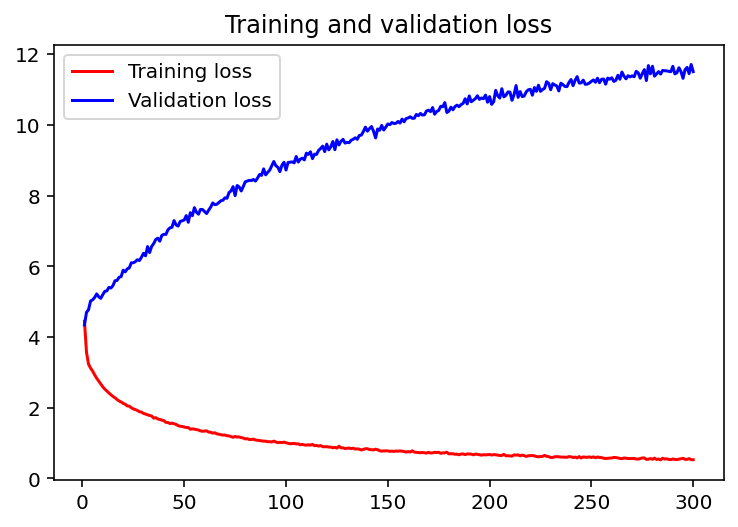

In [ ]:
from matplotlib import pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'b', color='red',label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


# loss 그래프를 살펴보면 Training loss는 점점 하락.
# 하지만 Vaildation loss는 높으므로 좋은 모델이 아님, epochs 향상 필요.


In [ ]:
# 7. 모델 사용하기
pred_count = len(song)- window_size # 최대 예측 개수 정의

In [ ]:
# 한 스텝 예측

one_step_seq_out = song[:2]
pred_out = model.predict(mlp_x_train)
 
#그냥 
for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # 인덱스의 최대값을 뽑아옴. 
    one_step_seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", one_step_seq_out)


one step prediction :  [['A5', 6], ['G#5', 16], ['A5', 8], ['B5', 6], ['A5', 16], ['B5', 8], ['C#6', 6], ['A5', 16], ['B5', 8], ['C#6', 8], ['D6', 4], ['B5', 8], ['A5', 8], ['A5', 6], ['B5', 16], ['C#6', 8], ['B5', 6], ['G#5', 16], ['A5', 2], ['A5', 6], ['G#5', 16], ['A5', 8], ['B5', 6], ['A5', 16], ['B5', 8], ['C#6', 6], ['A5', 16], ['B5', 8], ['C#6', 8], ['D6', 4], ['B5', 8], ['E6', 8], ['E6', 6], ['D6', 16], ['C#6', 8], ['D6', 6], ['E6', 4], ['E6', 4], ['F#6', 8], ['F#6', 8], ['E6', 4], ['D6', 8], ['C#6', 8], ['D6', 8], ['E6', 4], ['F#6', 8], ['F#6', 8], ['A6', 4], ['F#6', 8], ['E6', 4], ['F#6', 8], ['F#6', 8], ['E6', 4], ['D6', 8], ['C#6', 8], ['D6', 8], ['E6', 4], ['F#6', 8], ['D5', 8], ['G5', 8], ['D5', 16], ['D5', 8], ['D5', 8], ['D5', 8], ['D5', 8], ['D5', 8], ['G5', 6], ['E5', 8], ['G5', 6], ['E5', 8], ['D5', 8], ['F#5', 8], ['A5', 8], ['C6', 16], ['C6', 8], ['B5', 8], ['A5', 8], ['A5', 8], ['G5', 16], ['B4', 16], ['B4', 16], ['B4', 16], ['B4', 16], ['B4', 16], ['B4', 16], ['B

In [ ]:
print(pred_out[i])

[2.56653314e-13 1.80807407e-03 1.17584388e-11 1.21054210e-17
 9.02341285e-14 1.18335571e-12 1.27262772e-15 1.46438195e-09
 2.21572418e-06 3.57067108e-07 4.26427123e-13 2.61512446e-06
 5.29834302e-04 8.94322220e-05 2.55258712e-08 8.24464940e-15
 1.06222212e-10 8.43608156e-14 4.99163936e-14 3.02303518e-14
 5.00941553e-15 8.14740392e-14 1.42958114e-13 5.97406612e-24
 5.78756823e-13 2.31063795e-14 3.95114714e-13 1.40976505e-14
 1.87263006e-13 4.19347128e-20 1.39227090e-13 1.61193568e-13
 7.50662756e-14 1.03194776e-13 1.79709458e-14 3.11503143e-14
 7.14357268e-28 9.45775373e-14 1.33340282e-14 1.65163537e-13
 1.00197713e-14 6.15807373e-13 5.22127473e-14 1.64882061e-14
 1.60171477e-13 2.78725170e-14 8.54298142e-22 4.53930818e-14
 2.40465417e-03 9.62467313e-01 1.24243497e-13 3.59018811e-15
 6.11600140e-14 1.19819980e-13 8.55522928e-14 1.40628188e-14
 2.42333931e-06 1.47989734e-14 3.53094365e-05 2.31379456e-30
 1.96876325e-14 2.05205793e-13 4.85088569e-15 4.08546621e-04
 1.25974411e-10 6.042029

In [ ]:
#곡 전체 예측

# seq_in = [['c4', 4], ['c4', 4], ['c4', 4], ['d4', 8]]
# seq_in = song[:4]

#인덱스에서 랜덤하게 뽑아서 넣어주는 걸로 수정###############

seq_in = [idx2code[1],idx2code[2],idx2code[3],idx2code[4]]

full_seq_out =song[:2]
temp_list= []

#seq_in값을 인덱스로 변환
i = 0
for convert_item in seq_in :          
    seq_in[i] = code2idx[str(convert_item[0])+"_"+str(convert_item[1])]/float(max_idx_value)
    i += 1
print(seq_in)

for i in range(pred_count):
    sample_in = np.array(seq_in)  # code2idx[code]/float(max_idx_value) 1~14를 14로 나눈값
    sample_in = np.reshape(sample_in, (1, 4)) # [[0.9 0.7 0.8 0.9]], batch_size, feature 
    pred_out = model.predict(sample_in) # [[0.9 0.7 0.8 0.9]] 이것만 갖고 예측하도록 만든 곳
    idx = np.argmax(pred_out)  # 인덱스 0~13에 대한 예측값중 확률이 가장 높은 인덱스를 뽑습니다.
    full_seq_out.append(idx2code[idx]) #//인덱스를 코드로 변환하여 full_seq_out리스트에 추가
    seq_in.append(idx / float(max_idx_value))  #  seq_in리스트에도 추가
    seq_in.pop(0) #//seq_in 0번째 인덱스 삭제(4개 유지)//reshape을 위해
    

print("full song prediction : ", full_seq_out)

[0.009523809523809525, 0.01904761904761905, 0.02857142857142857, 0.0380952380952381]
full song prediction :  [['A5', 6], ['G#5', 16], ['A5', 8], ['B5', 6], ['F#5', 8], ['A4', 8], ['A5', 8], ['A5', 16], ['A5', 8], ['A5', 8], ['B4', 4], ['D5', 4], ['D5', 8], ['D5', 8], ['D5', 8], ['G4', 4], ['G5', 6], ['G5', 16], ['G5', 4], ['A4', 8], ['A4', 8], ['A5', 8], ['A5', 16], ['A5', 8], ['A5', 8], ['B4', 4], ['D5', 4], ['D5', 8], ['D5', 8], ['D5', 8], ['G4', 4], ['G5', 6], ['G5', 16], ['G5', 4], ['A4', 8], ['A4', 8], ['A5', 8], ['A5', 16], ['A5', 8], ['A5', 8], ['B4', 4], ['D5', 4], ['D5', 8], ['D5', 8], ['D5', 8], ['G4', 4], ['G5', 6], ['G5', 16], ['G5', 4], ['A4', 8], ['A4', 8], ['A5', 8], ['A5', 16], ['A5', 8], ['A5', 8], ['B4', 4], ['D5', 4], ['D5', 8], ['D5', 8], ['D5', 8], ['G4', 4], ['G5', 6], ['G5', 16], ['G5', 4], ['A4', 8], ['A4', 8], ['A5', 8], ['A5', 16], ['A5', 8], ['A5', 8], ['B4', 4], ['D5', 4], ['D5', 8], ['D5', 8], ['D5', 8], ['G4', 4], ['G5', 6], ['G5', 16], ['G5', 4], ['A4', 8

In [ ]:
print(full_seq_out)

[['A5', 6], ['G#5', 16], ['A5', 8], ['B5', 6], ['F#5', 8], ['A4', 8], ['A5', 8], ['A5', 16], ['A5', 8], ['A5', 8], ['B4', 4], ['D5', 4], ['D5', 8], ['D5', 8], ['D5', 8], ['G4', 4], ['G5', 6], ['G5', 16], ['G5', 4], ['A4', 8], ['A4', 8], ['A5', 8], ['A5', 16], ['A5', 8], ['A5', 8], ['B4', 4], ['D5', 4], ['D5', 8], ['D5', 8], ['D5', 8], ['G4', 4], ['G5', 6], ['G5', 16], ['G5', 4], ['A4', 8], ['A4', 8], ['A5', 8], ['A5', 16], ['A5', 8], ['A5', 8], ['B4', 4], ['D5', 4], ['D5', 8], ['D5', 8], ['D5', 8], ['G4', 4], ['G5', 6], ['G5', 16], ['G5', 4], ['A4', 8], ['A4', 8], ['A5', 8], ['A5', 16], ['A5', 8], ['A5', 8], ['B4', 4], ['D5', 4], ['D5', 8], ['D5', 8], ['D5', 8], ['G4', 4], ['G5', 6], ['G5', 16], ['G5', 4], ['A4', 8], ['A4', 8], ['A5', 8], ['A5', 16], ['A5', 8], ['A5', 8], ['B4', 4], ['D5', 4], ['D5', 8], ['D5', 8], ['D5', 8], ['G4', 4], ['G5', 6], ['G5', 16], ['G5', 4], ['A4', 8], ['A4', 8], ['A5', 8], ['A5', 16], ['A5', 8], ['A5', 8], ['B4', 4], ['D5', 4], ['D5', 8], ['D5', 8], ['D5',

In [ ]:
make_midi(midi_path='midi/multilayer_perceptron_song1.mid', notes=one_step_seq_out)

In [ ]:
make_midi(midi_path='midi/multilayer_perceptron_song2.mid', notes=full_seq_out)

**Vanilla RNN**

In [ ]:
from keras.layers import SimpleRNN, Activation, LSTM, Flatten, GRU

In [ ]:
srnn_x_train = dataset[:,0:2]   #  학습필요.  행 : 전체, 로우 : 0,1,2,3 가져옴.
srnn_y_train = dataset[:,2] 


# 입력값 정규화 시키기
srnn_x_train = srnn_x_train / float(max_idx_value)  


# 입력을 (샘플 수, 타입스텝, 특성 수)로 형태 변환 //RNN입력 맞춰주려고 reshape
srnn_x_train = np.reshape(srnn_x_train, (pred_count, 2, 1)) # 정말 중요 !!! //입력되는 음표 1개당 하나의 인덱스 값을 입력하므로 속성이 1개
# 정말 중요 !!!!

# y값에 대한 라벨값에 대한 one-hot 인코딩 수행 이유 : 구분되야 하는 값이 3개가 넘어가므로 원핫인코딩 해줌.
srnn_y_train = np_utils.to_categorical(srnn_y_train)

one_hot_vec_size = srnn_y_train.shape[1]  

print("one hot encoding vector size is ", one_hot_vec_size)

one hot encoding vector size is  114


In [ ]:
srnn_x_train.shape

(381, 4, 1)

In [ ]:
model = Sequential()
model.add(SimpleRNN(256, input_shape = (4, 1)))
Dropout = 0.3
#model.add(SimpleRNN(128))
model.add(Dense(128, activation='relu'))
Dropout = 0.3
#model.add(Flatten())
model.add(Dense(one_hot_vec_size, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 256)               66048     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 114)               14706     
Total params: 113,650
Trainable params: 113,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.weights

[<tf.Variable 'simple_rnn_1/kernel:0' shape=(1, 256) dtype=float32, numpy=
 array([[-0.03125796,  0.08917873,  0.02881871,  0.12012233, -0.12776041,
          0.11075319, -0.00046104,  0.02198361,  0.02008325, -0.00890408,
         -0.13605201,  0.15046044,  0.0862985 ,  0.13135706, -0.06694933,
         -0.08444851, -0.09523603, -0.02199505,  0.10079749, -0.08809128,
          0.07548457,  0.00173847, -0.08291845, -0.04784194,  0.1062827 ,
          0.03276661,  0.05913426, -0.12293905, -0.0972856 , -0.02789687,
          0.08742845, -0.10492618, -0.08886129,  0.13571234,  0.13948424,
          0.1020688 ,  0.12810154, -0.055174  , -0.07312768, -0.07773112,
         -0.01303115,  0.11379103, -0.05109911,  0.02025269, -0.07002421,
          0.0787742 ,  0.07706954, -0.05203093,  0.14832355, -0.11376783,
         -0.0702058 , -0.03008509, -0.09018377, -0.12971054, -0.14790836,
         -0.11515585,  0.13593046,  0.0295921 ,  0.13186575, -0.14832748,
          0.12492795,  0.10989209,  0

In [ ]:
history = model.fit(srnn_x_train, srnn_y_train, epochs=100, batch_size=10, verbose=1, validation_split=0.2)

Train on 304 samples, validate on 77 samples
Epoch 1/100
304/304 [==============================] - 0s 1ms/step - loss: 4.2283 - accuracy: 0.0724 - val_loss: 3.3778 - val_accuracy: 0.2078
Epoch 2/100
304/304 [==============================] - 0s 576us/step - loss: 3.5579 - accuracy: 0.1250 - val_loss: 3.2059 - val_accuracy: 0.1558
Epoch 3/100
304/304 [==============================] - 0s 590us/step - loss: 3.4535 - accuracy: 0.1020 - val_loss: 3.1141 - val_accuracy: 0.1169
Epoch 4/100
304/304 [==============================] - 0s 553us/step - loss: 3.3476 - accuracy: 0.1250 - val_loss: 3.0369 - val_accuracy: 0.1818
Epoch 5/100
304/304 [==============================] - 0s 527us/step - loss: 3.2908 - accuracy: 0.1579 - val_loss: 2.9802 - val_accuracy: 0.1818
Epoch 6/100
304/304 [==============================] - 0s 548us/step - loss: 3.2153 - accuracy: 0.1908 - val_loss: 2.8159 - val_accuracy: 0.2857
Epoch 7/100
304/304 [==============================] - 0s 548us/step - loss: 3.1265 - a

In [ ]:
scores = model.evaluate(srnn_x_train, srnn_y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

381/381 [==============================] - 0s 68us/step
accuracy: 75.33%


In [ ]:
history.history['val_loss']

[3.3778460892764004,
 3.2059264244971337,
 3.1141420215755313,
 3.036943531655646,
 2.9801992007664273,
 2.81593977940547,
 2.784471967003562,
 2.655663350959877,
 2.6525955107304955,
 2.5126386571240116,
 2.4395909928656243,
 2.4930956146933814,
 2.3377990707174523,
 2.286628325264175,
 2.2373973363405697,
 2.1840667724609375,
 2.060517479847004,
 2.017497291812649,
 1.9406154527292623,
 2.059607801499305,
 1.8986816096615482,
 1.9001577597159844,
 1.8261543264636746,
 1.6778421990283123,
 1.7370817521949866,
 1.7702002881409287,
 1.6498898407081506,
 1.6095319893453028,
 1.574884852805695,
 1.5000004195547723,
 1.5770162343978882,
 1.4850911768999966,
 1.3927521395992923,
 1.335692043428297,
 1.3226600126786665,
 1.2031547760034536,
 1.5623143384983014,
 1.1754536357792942,
 1.1658274895185,
 1.1919387207402812,
 1.3709770518463928,
 1.1144905554783808,
 1.1711194120444262,
 1.2562254311202408,
 1.1381727859571382,
 1.089813855561343,
 1.0618408461669824,
 1.0016878820084907,
 1.0031

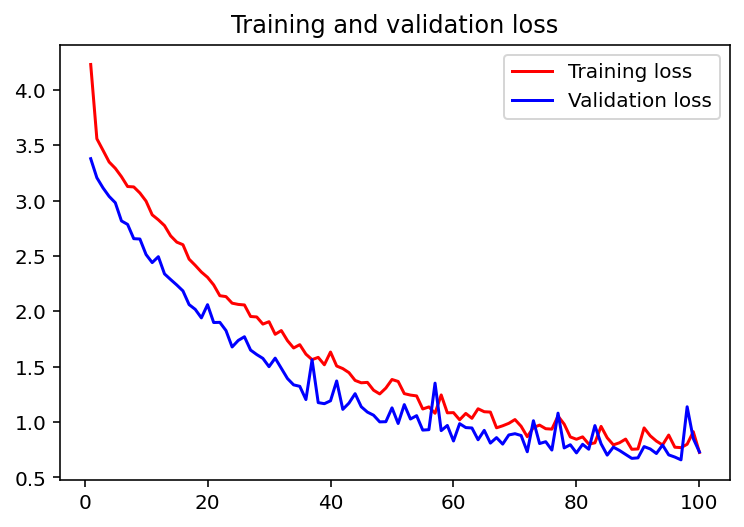

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'b', color='red',label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


# loss 그래프를 살펴보면 Training loss는 점점 하락.
# 하지만 Vaildation loss는 높아지는 것을 봤을 때 과적합인것을 의심 가능. 그러므로  epochs 증가 학습 더 필요.

In [ ]:
mlp_x_train = dataset[:,0:2]   #  학습필요.  행 : 전체, 로우 : 0,1,2,3 가져옴. 
mlp_y_train = dataset[:,2]     #  학습필요   행 : 전체, 로우 : 4번째 만 가져옴.

max_idx_value = len(idx2code)  # 총 13개 데이터에서 나눠줘야 하기 때문에 0~10. 최대값인 14으로 나눠졌다.
# # 1. 데이터 준비하기. 나온 것들 하나씩 Unique 하게 나열.
# 코드 사전 정의
# 코드를 숫자로  여기에서 정의된 것들이 0~ 10까지 있다.


# 입력값 정규화 시키기
mlp_x_train = mlp_x_train / float(max_idx_value)   # 14.0

# y값에 대한 라벨값에 대한 one-hot 인코딩 수행 이유 : 구분되야 하는 값(종류)이 3개가 넘어가므로 원핫인코딩 해줌. 2개를 안쓰므로 11개로 해줌.
mlp_y_train = np_utils.to_categorical(mlp_y_train)

one_hot_vec_size = mlp_y_train.shape[1]  # 이 부분은 14라고 정수로 써줘도 무관.

print("one hot encoding vector size is ", one_hot_vec_size)

one hot encoding vector size is  114


In [ ]:
# mlp_y_train

In [ ]:
# 한 스텝 예측

one_step_seq_out = song[:2]
pred_out = model.predict(srnn_x_train)
 
#그냥 
for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # 인덱스의 최대값을 뽑아옴. 
    one_step_seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", one_step_seq_out)


one step prediction :  [['D5', 8], ['A4', 8], ['E5', 8], ['F#5', 4], ['G5', 8], ['A5', 1], ['G5', 16], ['G5', 16], ['F#5', 8], ['G4', 8], ['A4', 8], ['D5', 4], ['E5', 8], ['G5', 2], ['G5', 16], ['F#5', 16], ['F#5', 4], ['G5', 16], ['E5', 8], ['D5', 16], ['F#4', 8], ['D5', 4], ['B4', 4], ['A4', 4], ['A4', 8], ['D6', 8], ['A5', 1], ['A5', 8], ['F#5', 8], ['G5', 16], ['G5', 16], ['C#5', 8], ['F#4', 8], ['D5', 8], ['A5', 6], ['G#5', 16], ['A5', 8], ['B5', 6], ['A5', 16], ['B5', 8], ['C#6', 6], ['A5', 16], ['B5', 8], ['C#6', 8], ['D6', 4], ['B5', 8], ['E6', 8], ['A5', 6], ['E6', 4], ['A5', 8], ['A5', 8], ['C#6', 6], ['A5', 2], ['A5', 6], ['G#5', 16], ['A5', 8], ['B5', 6], ['A5', 16], ['B5', 8], ['C#6', 6], ['A5', 16], ['B5', 8], ['C#6', 8], ['D6', 4], ['B5', 8], ['E6', 8], ['E6', 6], ['D6', 16], ['C#6', 8], ['D6', 6], ['E6', 4], ['E6', 4], ['E6', 6], ['F#6', 8], ['E6', 4], ['D6', 8], ['C#6', 8], ['D6', 8], ['E6', 4], ['B4', 8], ['D6', 8], ['A6', 4], ['F#6', 8], ['A5', 8], ['F#6', 8], ['F#6'

In [ ]:
#곡 전체 예측

seq_in = song[:2]
full_seq_out =song[:2]
temp_list= []

#seq_in값을 인덱스로 변환
i = 0
for convert_item in seq_in :          
    seq_in[i] = code2idx[str(convert_item[0])+"_"+str(convert_item[1])]/float(max_idx_value)
    i += 1
print(seq_in)

for i in range(pred_count):
    sample_in = np.array(seq_in)  # code2idx[code]/float(max_idx_value) 
    sample_in = np.reshape(sample_in, (1, 4, 1)) 
    pred_out = model.predict(sample_in) # 
    idx = np.argmax(pred_out)  # 인덱스에대한 예측값중 확률이 가장 높은 인덱스를 뽑습니다.
    full_seq_out.append(idx2code[idx]) #//인덱스를 코드로 변환하여 full_seq_out리스트에 추가
    seq_in.append(idx / float(max_idx_value))  #  seq_in리스트에도 추가
    seq_in.pop(0) #//seq_in 0번째 인덱스 삭제(4개 유지)//reshape을 위해
    

print("full song prediction : ", full_seq_out)

[0.14035087719298245, 0.5087719298245614, 0.2982456140350877, 0.8596491228070176]
full song prediction :  [['D5', 8], ['A4', 8], ['E5', 8], ['F#5', 4], ['G5', 8], ['A5', 1], ['G5', 16], ['G5', 16], ['A5', 16], ['A5', 16], ['G5', 16], ['A5', 16], ['G5', 16], ['G5', 16], ['A5', 16], ['A5', 16], ['G5', 16], ['A5', 16], ['G5', 16], ['G5', 16], ['A5', 16], ['A5', 16], ['G5', 16], ['A5', 16], ['G5', 16], ['G5', 16], ['A5', 16], ['A5', 16], ['G5', 16], ['A5', 16], ['G5', 16], ['G5', 16], ['A5', 16], ['A5', 16], ['G5', 16], ['A5', 16], ['G5', 16], ['G5', 16], ['A5', 16], ['A5', 16], ['G5', 16], ['A5', 16], ['G5', 16], ['G5', 16], ['A5', 16], ['A5', 16], ['G5', 16], ['A5', 16], ['G5', 16], ['G5', 16], ['A5', 16], ['A5', 16], ['G5', 16], ['A5', 16], ['G5', 16], ['G5', 16], ['A5', 16], ['A5', 16], ['G5', 16], ['A5', 16], ['G5', 16], ['G5', 16], ['A5', 16], ['A5', 16], ['G5', 16], ['A5', 16], ['G5', 16], ['G5', 16], ['A5', 16], ['A5', 16], ['G5', 16], ['A5', 16], ['G5', 16], ['G5', 16], ['A5', 16]

In [ ]:
make_midi(midi_path='midi/RNN_song1.mid', notes=one_step_seq_out)

In [ ]:
make_midi(midi_path='midi/RNN_song2.mid', notes=full_seq_out)

# LSTM구현

In [ ]:
from keras.layers import LSTM

In [ ]:
lstm_x_train = dataset[:,0:4]   #  학습필요.  행 : 전체, 로우 : 0,1,2,3 가져옴. 
lstm_y_train = dataset[:,4]     #  학습필요   행 : 전체, 로우 : 4번째 만 가져옴.

max_idx_value = len(idx2code)  
# # 1. 데이터 준비하기. 나온 것들 하나씩 Unique 하게 나열.
# 코드 사전 정의



# 입력값 정규화 시키기
lstm_x_train = dataset[:,0:4]   #  학습필요.  행 : 전체, 로우 : 0,1,2,3 가져옴. 
lstm_x_train = lstm_x_train / float(max_idx_value)  

# 입력을 (샘플 수, 타입스텝, 특성 수)로 형태 변환
lstm_x_train = np.reshape(lstm_x_train, (pred_count, 4, 1)) # 정말 중요 !!!!
# 정말 중요 !!!!

# y값에 대한 라벨값에 대한 one-hot 인코딩 수행 이유 : 구분되야 하는 값(종류)이 3개가 넘어가므로 원핫인코딩 해줌. 
lstm_y_train = np_utils.to_categorical(lstm_y_train)

one_hot_vec_size = lstm_y_train.shape[1]  

print("one hot encoding vector size is ", one_hot_vec_size)

one hot encoding vector size is  114


In [ ]:
lstm_x_train.shape

(381, 4, 1)

In [ ]:
model = Sequential()
model.add(LSTM(256,input_shape = (4, 1))) #GRU를 호출
Dropout = 0.3

model.add(Dense(128, activation='relu'))
Dropout = 0.3

model.add(Dense(one_hot_vec_size, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 114)               14706     
Total params: 311,794
Trainable params: 311,794
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.weights

[<tf.Variable 'lstm_1/kernel:0' shape=(1, 1024) dtype=float32, numpy=
 array([[ 6.3586727e-02, -3.1946044e-02, -3.7912309e-02, ...,
          2.5522195e-02,  8.2105398e-06, -2.1737803e-02]], dtype=float32)>,
 <tf.Variable 'lstm_1/recurrent_kernel:0' shape=(256, 1024) dtype=float32, numpy=
 array([[ 0.0269277 ,  0.07836825, -0.00962192, ..., -0.00120426,
          0.01794483, -0.02954068],
        [-0.00127772, -0.01814433,  0.04177772, ...,  0.01508261,
         -0.10483848,  0.0406633 ],
        [ 0.04407658,  0.02261845, -0.0346355 , ..., -0.02207945,
          0.031541  , -0.02295716],
        ...,
        [ 0.01099814, -0.00464096,  0.05904537, ..., -0.01937867,
          0.02559642, -0.01352958],
        [-0.00383708, -0.03184636, -0.00353436, ..., -0.01025383,
          0.01672632,  0.02195012],
        [-0.01779932, -0.00293106, -0.00354449, ...,  0.00407896,
         -0.07026127, -0.00839026]], dtype=float32)>,
 <tf.Variable 'lstm_1/bias:0' shape=(1024,) dtype=float32, numpy=ar

In [ ]:
history = model.fit(lstm_x_train, lstm_y_train, epochs=100, batch_size=10, verbose=1, validation_split=0.2)

Train on 304 samples, validate on 77 samples
Epoch 1/100
304/304 [==============================] - 1s 3ms/step - loss: 4.5277 - accuracy: 0.0658 - val_loss: 3.4774 - val_accuracy: 0.1299
Epoch 2/100
304/304 [==============================] - 0s 2ms/step - loss: 3.5602 - accuracy: 0.1086 - val_loss: 3.2097 - val_accuracy: 0.1169
Epoch 3/100
304/304 [==============================] - 0s 2ms/step - loss: 3.4267 - accuracy: 0.1151 - val_loss: 3.1917 - val_accuracy: 0.1299
Epoch 4/100
304/304 [==============================] - 0s 2ms/step - loss: 3.3946 - accuracy: 0.0855 - val_loss: 3.1116 - val_accuracy: 0.1299
Epoch 5/100
304/304 [==============================] - 0s 2ms/step - loss: 3.3787 - accuracy: 0.1020 - val_loss: 3.1197 - val_accuracy: 0.1169
Epoch 6/100
304/304 [==============================] - 0s 2ms/step - loss: 3.3601 - accuracy: 0.0921 - val_loss: 3.1750 - val_accuracy: 0.1299
Epoch 7/100
304/304 [==============================] - 0s 1ms/step - loss: 3.3620 - accuracy: 0.1

In [ ]:
scores = model.evaluate(lstm_x_train, lstm_y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
model.reset_states()

381/381 [==============================] - 0s 145us/step
accuracy: 74.80%


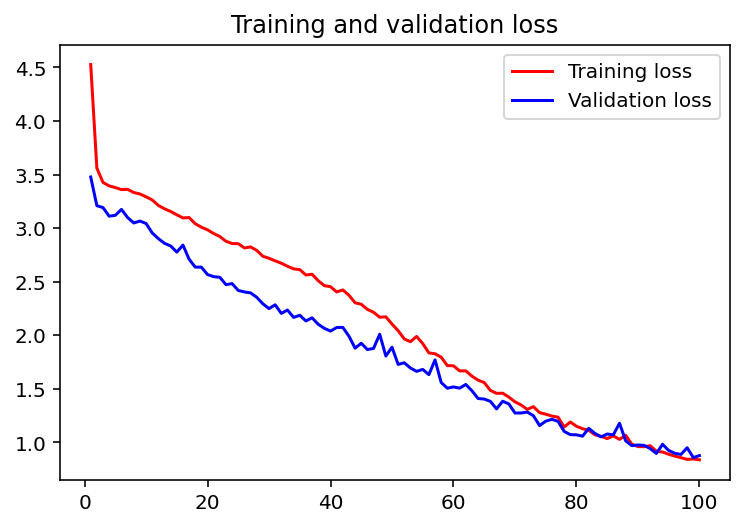

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'b', color='red',label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


# loss 그래프를 살펴보면 Training loss는 점점 하락.
# 하지만 Vaildation loss는 높아지는 것을 봤을 때 과적합인것을 의심 가능.

In [ ]:
# 한스템 예측

one_step_seq_out = song[:4]
pred_out = model.predict(lstm_x_train)
 
#그냥 
for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # 인덱스의 최대값을 뽑아옴. 
    one_step_seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", one_step_seq_out)

one step prediction :  [['D5', 8], ['A4', 8], ['E5', 8], ['F#5', 4], ['G5', 8], ['A5', 1], ['E5', 4], ['G5', 16], ['F#5', 8], ['G4', 8], ['A5', 8], ['A5', 8], ['B4', 8], ['G5', 2], ['G5', 16], ['F#5', 16], ['F#5', 4], ['E5', 8], ['E5', 8], ['D5', 4], ['F#4', 8], ['D5', 4], ['D5', 8], ['A4', 4], ['A4', 8], ['D6', 8], ['A5', 1], ['A5', 8], ['F#5', 8], ['G5', 16], ['G5', 16], ['C#5', 8], ['D5', 8], ['D5', 8], ['A5', 6], ['G#5', 16], ['A5', 8], ['B5', 6], ['A5', 16], ['B5', 8], ['C#6', 6], ['A5', 16], ['B5', 8], ['C#6', 8], ['D6', 8], ['B5', 8], ['A5', 8], ['A5', 6], ['B5', 16], ['C#6', 8], ['G5', 16], ['G#5', 16], ['A5', 2], ['A5', 6], ['G#5', 16], ['A5', 8], ['A5', 8], ['A5', 16], ['B5', 8], ['C#6', 6], ['A5', 16], ['B5', 8], ['C#6', 8], ['D6', 8], ['B5', 8], ['E6', 8], ['F#6', 8], ['D6', 16], ['C#6', 8], ['D6', 6], ['F#6', 16], ['E6', 4], ['F#6', 8], ['F#6', 8], ['E6', 4], ['D6', 8], ['C#6', 8], ['D6', 8], ['E6', 4], ['F#6', 8], ['F#6', 8], ['A6', 4], ['F#6', 8], ['E6', 4], ['F#6', 8], 

In [ ]:
#곡 전체 예측

seq_in = song[:4]
full_seq_out =song[:4]
temp_list= []

#seq_in값을 인덱스로 변환
i = 0
for convert_item in seq_in :          
    seq_in[i] = code2idx[str(convert_item[0])+"_"+str(convert_item[1])]/float(max_idx_value)
    i += 1
print(seq_in)

for i in range(pred_count):
    sample_in = np.array(seq_in)  # code2idx[code]/float(max_idx_value)
    sample_in = np.reshape(sample_in, (1, 4, 1)) 
    pred_out = model.predict(sample_in) 
    idx = np.argmax(pred_out)  
    full_seq_out.append(idx2code[idx]) #//인덱스를 코드로 변환하여 full_seq_out리스트에 추가
    seq_in.append(idx / float(max_idx_value))  #  seq_in리스트에도 추가
    seq_in.pop(0) #//seq_in 0번째 인덱스 삭제(4개 유지)//reshape을 위해
    

print("full song prediction : ", full_seq_out)

[0.14035087719298245, 0.5087719298245614, 0.2982456140350877, 0.8596491228070176]
full song prediction :  [['D5', 8], ['A4', 8], ['E5', 8], ['F#5', 4], ['G5', 8], ['A5', 1], ['E5', 4], ['G5', 16], ['C#5', 8], ['D5', 8], ['F#5', 8], ['G5', 16], ['A5', 16], ['G5', 16], ['G5', 16], ['A5', 16], ['A5', 16], ['G5', 16], ['B4', 8], ['D5', 8], ['B4', 16], ['D5', 8], ['D5', 8], ['D5', 8], ['B4', 8], ['G4', 4], ['G5', 6], ['D6', 8], ['G5', 16], ['F#5', 8], ['G5', 16], ['G5', 16], ['A5', 16], ['A5', 16], ['G5', 16], ['B4', 8], ['D5', 8], ['B4', 16], ['D5', 8], ['D5', 8], ['D5', 8], ['B4', 8], ['G4', 4], ['G5', 6], ['D6', 8], ['G5', 16], ['F#5', 8], ['G5', 16], ['G5', 16], ['A5', 16], ['A5', 16], ['G5', 16], ['B4', 8], ['D5', 8], ['B4', 16], ['D5', 8], ['D5', 8], ['D5', 8], ['B4', 8], ['G4', 4], ['G5', 6], ['D6', 8], ['G5', 16], ['F#5', 8], ['G5', 16], ['G5', 16], ['A5', 16], ['A5', 16], ['G5', 16], ['B4', 8], ['D5', 8], ['B4', 16], ['D5', 8], ['D5', 8], ['D5', 8], ['B4', 8], ['G4', 4], ['G5', 6],

In [ ]:
make_midi(midi_path='midi/lstm_song1.mid', notes = one_step_seq_out)

In [ ]:
make_midi(midi_path='midi/lstm_song2.mid', notes = full_seq_out)

Stateful LSTM 
# 상태유지 모드에서는 현재 샘플의 학습 상태가 다음 샘플의 초기 상태로 전달된다.

In [ ]:
slstm_x_train = dataset[:,0:4]   #  학습필요.  행 : 전체, 로우 : 0,1,2,3 가져옴. 
slstm_y_train = dataset[:,4]     #  학습필요   행 : 전체, 로우 : 4번째 만 가져옴.

max_idx_value = len(idx2code)  
# # 1. 데이터 준비하기. 나온 것들 하나씩 Unique 하게 나열.
# 코드 사전 정의



# 입력값 정규화 시키기
slstm_x_train = dataset[:,0:4]   #  학습필요.  행 : 전체, 로우 : 0,1,2,3 가져옴. 
slstm_x_train = slstm_x_train / float(max_idx_value)  

# 입력을 (샘플 수, 타입스텝, 특성 수)로 형태 변환
slstm_x_train = np.reshape(slstm_x_train, (pred_count, 4, 1)) # 정말 중요 !!!!
# 정말 중요 !!!!

# y값에 대한 라벨값에 대한 one-hot 인코딩 수행 이유 : 구분되야 하는 값(종류)이 3개가 넘어가므로 원핫인코딩 해줌.
slstm_y_train = np_utils.to_categorical(slstm_y_train)

one_hot_vec_size = slstm_y_train.shape[1]  

print("one hot encoding vector size is ", one_hot_vec_size)

one hot encoding vector size is  114


In [ ]:
model = Sequential()
model.add(LSTM(256, batch_input_shape = (1, 4, 1), stateful=True, return_sequences=True))   # 상태유지 LSTM 모델을 생성하기 위해서는 LSTM 레이어 생성 시, stateful=True로 설정
 # 상태유지 모드에서는 입력형태를 batch_input_shape = (배치사이즈, 타임스텝, 속성)으로 설정
dropout=0.3
model.add(LSTM(128, return_sequences=False))
dropout=0.3
model.add(Dense(one_hot_vec_size, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.weights

[<tf.Variable 'lstm_2/kernel:0' shape=(1, 1024) dtype=float32, numpy=
 array([[ 0.03692538,  0.07240365, -0.03983657, ...,  0.07585908,
         -0.05923869, -0.01773048]], dtype=float32)>,
 <tf.Variable 'lstm_2/recurrent_kernel:0' shape=(256, 1024) dtype=float32, numpy=
 array([[-0.00643767,  0.0126544 , -0.02519408, ..., -0.01893472,
         -0.00363361, -0.01528832],
        [-0.00331365,  0.02769082, -0.04711854, ...,  0.03077648,
          0.01324323,  0.02465136],
        [-0.01474253,  0.09148407,  0.00378045, ..., -0.02787887,
         -0.01273012, -0.01890136],
        ...,
        [-0.01713104,  0.05778105,  0.04831112, ..., -0.00067839,
          0.00790206,  0.00216177],
        [-0.01624077,  0.00798725,  0.00798379, ...,  0.08033568,
         -0.01322557,  0.02669325],
        [ 0.00195395, -0.04391233,  0.01883696, ...,  0.00483637,
         -0.07977208, -0.03341516]], dtype=float32)>,
 <tf.Variable 'lstm_2/bias:0' shape=(1024,) dtype=float32, numpy=array([0., 0., 0., .

In [ ]:
slstm_x_train

array([[[0.14035088],
        [0.50877193],
        [0.29824561],
        [0.85964912]],

       [[0.50877193],
        [0.29824561],
        [0.85964912],
        [0.0877193 ]],

       [[0.29824561],
        [0.85964912],
        [0.0877193 ],
        [0.78947368]],

       ...,

       [[0.09649123],
        [0.83333333],
        [0.09649123],
        [0.09649123]],

       [[0.83333333],
        [0.09649123],
        [0.09649123],
        [0.83333333]],

       [[0.09649123],
        [0.09649123],
        [0.83333333],
        [0.83333333]]])

In [ ]:
num_epochs = 2

for epoch_idx in range(num_epochs):
    print ('epochs : ' + str(epoch_idx) )
    #model.fit(slstm_x_train, slstm_y_train, epochs=1, batch_size=1, verbose=2, shuffle=False)
    history = model.fit(slstm_x_train, slstm_y_train, epochs=1, batch_size=1, verbose=1, shuffle=False, validation_split=0.2)
    model.reset_states()

epochs : 0
Train on 304 samples, validate on 77 samples
Epoch 1/1
304/304 [==============================] - 4s 14ms/step - loss: 3.8532 - accuracy: 0.0559 - val_loss: 3.0677 - val_accuracy: 0.1299
epochs : 1
Train on 304 samples, validate on 77 samples
Epoch 1/1
304/304 [==============================] - 4s 13ms/step - loss: 3.3655 - accuracy: 0.0757 - val_loss: 3.0093 - val_accuracy: 0.1299


In [ ]:
#윗 부분 모델학습 코드 수정이 필요합니다. 

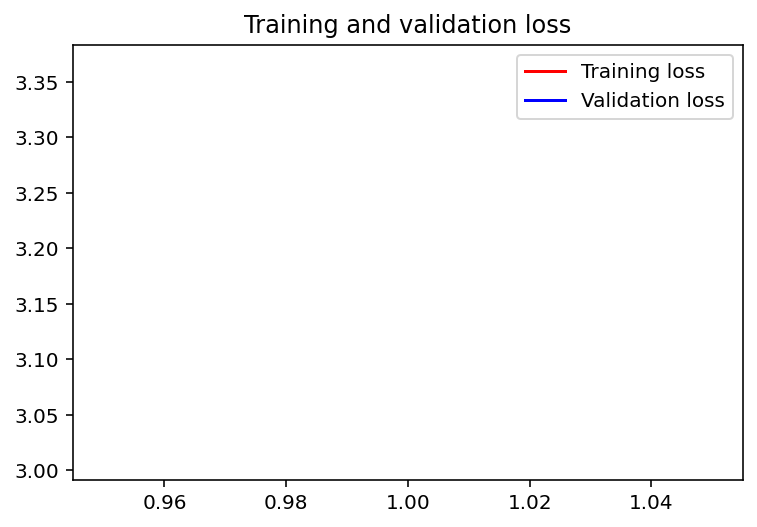

In [ ]:

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'b', color='red',label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
scores = model.evaluate(slstm_x_train, slstm_y_train, batch_size=1)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
model.reset_states()

381/381 [==============================] - 1s 1ms/step
accuracy: 11.02%


# 한 스텝 예측  # 사용??????

one_step_seq_out = song[:4]
pred_out = model.predict(slstm_x_train)
 
#그냥 
for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # 인덱스의 최대값을 뽑아옴. 
    one_step_seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", one_step_seq_out)

In [ ]:
#곡 전체 예측

seq_in = song[:4]
full_seq_out =song[:4]
temp_list= []

#seq_in값을 인덱스로 변환
i = 0
for convert_item in seq_in :          
    seq_in[i] = code2idx[str(convert_item[0])+"_"+str(convert_item[1])]/float(max_idx_value)
    i += 1
print(seq_in)

for i in range(pred_count):
    sample_in = np.array(seq_in)  # code2idx[code]/float(max_idx_value) 
    sample_in = np.reshape(sample_in, (1, 4, 1)) 
    pred_out = model.predict(sample_in) 
    idx = np.argmax(pred_out)  # 인덱스에 대한 예측값중 확률이 가장 높은 인덱스를 뽑습니다.
    full_seq_out.append(idx2code[idx]) #//인덱스를 코드로 변환하여 full_seq_out리스트에 추가
    seq_in.append(idx / float(max_idx_value))  #  seq_in리스트에도 추가
    seq_in.pop(0) #//seq_in 0번째 인덱스 삭제(4개 유지)//reshape을 위해
    

print("full song prediction : ", full_seq_out)


[0.14035087719298245, 0.5087719298245614, 0.2982456140350877, 0.8596491228070176]
full song prediction :  [['D5', 8], ['A4', 8], ['E5', 8], ['F#5', 4], ['D5', 8], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16], ['G5', 16

In [ ]:
make_midi(midi_path='midi/lstm_song_state_true.mid', notes = full_seq_out)

# GRU 구현

GRU 이해
https://it-ist.tistory.com/27

In [ ]:
gru_x_train = dataset[:,0:4]   #  학습필요.  행 : 전체, 로우 : 0,1,2,3 가져옴. 
gru_y_train = dataset[:,4]     #  학습필요   행 : 전체, 로우 : 4번째 만 가져옴.

max_idx_value = len(idx2code)  
# # 1. 데이터 준비하기. 나온 것들 하나씩 Unique 하게 나열.
# 코드 사전 정의



# 입력값 정규화 시키기
gru_x_train = dataset[:,0:4]   #  학습필요.  행 : 전체, 로우 : 0,1,2,3 가져옴. 
gru_x_train = gru_x_train / float(max_idx_value)  

# 입력을 (샘플 수, 타입스텝, 특성 수)로 형태 변환
gru_x_train = np.reshape(gru_x_train, (pred_count, 4, 1)) # 정말 중요 !!!!
# 정말 중요 !!!!

# y값에 대한 라벨값에 대한 one-hot 인코딩 수행 이유 : 구분되야 하는 값(종류)이 3개가 넘어가므로 원핫인코딩 해줌. 
gru_y_train = np_utils.to_categorical(gru_y_train)

one_hot_vec_size = gru_y_train.shape[1]  

print("one hot encoding vector size is ", one_hot_vec_size)

one hot encoding vector size is  114


In [ ]:
model = Sequential()
model.add(GRU(256,input_shape = (4, 1))) #GRU를 호출
Dropout = 0.3
model.add(Dense(128, activation='relu'))
Dropout = 0.3
model.add(Dense(one_hot_vec_size, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 256)               198144    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 114)               14706     
Total params: 245,746
Trainable params: 245,746
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.weights

[<tf.Variable 'gru_1/kernel:0' shape=(1, 768) dtype=float32, numpy=
 array([[ 7.42652342e-02, -8.02520141e-02,  3.19935232e-02,
         -3.85422930e-02,  4.69316617e-02,  8.60129371e-02,
          3.37844416e-02, -3.13258246e-02, -3.80418114e-02,
          2.87775323e-02,  7.45092109e-02,  4.85399142e-02,
          6.53115734e-02, -1.09130368e-02, -3.84377688e-03,
          1.88734680e-02,  2.84086540e-02, -5.72222844e-02,
          2.07435265e-02, -3.42313088e-02,  3.43992338e-02,
         -6.22688904e-02,  8.61490890e-02, -3.35871764e-02,
          2.58464664e-02,  1.12195313e-03, -1.74916089e-02,
          8.01825523e-03, -7.09000006e-02,  3.24758515e-02,
          6.39931336e-02, -1.41770616e-02,  4.63910177e-02,
          3.30426991e-02,  7.76308402e-02, -1.63230300e-02,
          2.30619460e-02, -2.47408077e-02, -8.97211581e-03,
          5.09271994e-02, -6.99556619e-02,  5.70679829e-02,
          4.29634228e-02, -2.23128796e-02, -6.60043582e-02,
         -5.65570928e-02, -7.930

In [ ]:
history = model.fit(gru_x_train, gru_y_train, epochs=100, batch_size=10, verbose=1, validation_split=0.2)

Train on 304 samples, validate on 77 samples
Epoch 1/100
304/304 [==============================] - 1s 4ms/step - loss: 4.4273 - accuracy: 0.1053 - val_loss: 3.4581 - val_accuracy: 0.1169
Epoch 2/100
304/304 [==============================] - 1s 2ms/step - loss: 3.6080 - accuracy: 0.0658 - val_loss: 3.2246 - val_accuracy: 0.1429
Epoch 3/100
304/304 [==============================] - 1s 2ms/step - loss: 3.4400 - accuracy: 0.1283 - val_loss: 3.1673 - val_accuracy: 0.1429
Epoch 4/100
304/304 [==============================] - 1s 2ms/step - loss: 3.3822 - accuracy: 0.1086 - val_loss: 3.1189 - val_accuracy: 0.1688
Epoch 5/100
304/304 [==============================] - 1s 2ms/step - loss: 3.3296 - accuracy: 0.1217 - val_loss: 3.0707 - val_accuracy: 0.1429
Epoch 6/100
304/304 [==============================] - 1s 2ms/step - loss: 3.2888 - accuracy: 0.1151 - val_loss: 2.9852 - val_accuracy: 0.2468
Epoch 7/100
304/304 [==============================] - 1s 2ms/step - loss: 3.2409 - accuracy: 0.1

In [ ]:
scores = model.evaluate(gru_x_train, gru_y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
model.reset_states()

381/381 [==============================] - 0s 147us/step
accuracy: 79.79%


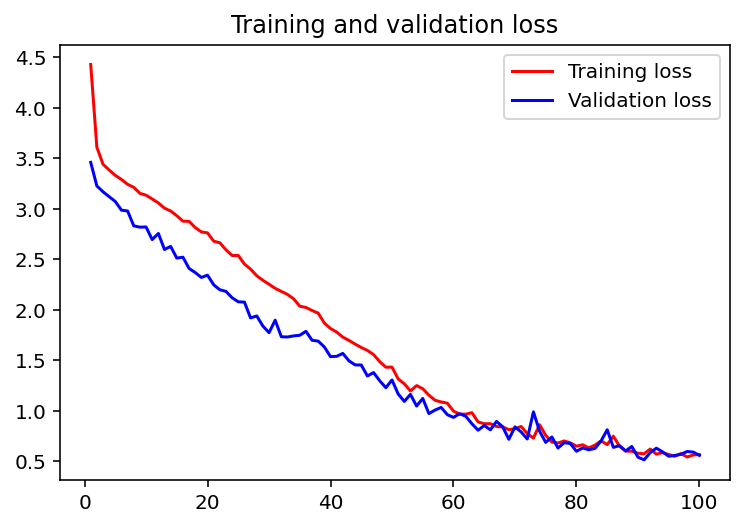

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'b', color='red',label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


# loss 그래프를 살펴보면 Training loss는 점점 하락.
# 하지만 Vaildation loss는 높아지는 것을 봤을 때 과적합인것을 의심 가능.

In [ ]:
# 한스템 예측

one_step_seq_out = song[:4]
pred_out = model.predict(gru_x_train)
 
#그냥 
for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # 인덱스의 최대값을 뽑아옴. 
    one_step_seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", one_step_seq_out)

one step prediction :  [['D5', 8], ['A4', 8], ['E5', 8], ['F#5', 4], ['G5', 8], ['A5', 1], ['E5', 4], ['F#5', 8], ['F#5', 8], ['G4', 8], ['A4', 8], ['D5', 4], ['E5', 8], ['G5', 2], ['G5', 16], ['F#5', 16], ['F#5', 4], ['E5', 8], ['B4', 8], ['D5', 4], ['F#4', 8], ['D5', 4], ['B4', 4], ['A5', 6], ['A4', 8], ['D6', 8], ['A5', 1], ['A5', 8], ['F#5', 8], ['E5', 4], ['G5', 16], ['C#5', 8], ['D5', 8], ['D5', 8], ['A5', 6], ['G#5', 16], ['A5', 8], ['B5', 6], ['A5', 16], ['B5', 8], ['C#6', 6], ['A5', 16], ['B5', 8], ['C#6', 8], ['D6', 8], ['B5', 8], ['E6', 8], ['A5', 6], ['B5', 16], ['C#6', 8], ['B5', 6], ['G#5', 16], ['A5', 2], ['A5', 6], ['G#5', 16], ['A5', 8], ['B5', 6], ['A5', 16], ['B5', 8], ['C#6', 6], ['A5', 16], ['B5', 8], ['C#6', 8], ['D6', 8], ['B5', 8], ['E6', 8], ['F#6', 8], ['D6', 16], ['C#6', 8], ['D6', 6], ['E6', 4], ['E6', 4], ['F#6', 8], ['F#6', 8], ['E6', 4], ['D6', 8], ['C#6', 8], ['D6', 8], ['E6', 4], ['F#6', 8], ['F#6', 8], ['A6', 4], ['F#6', 8], ['E6', 4], ['F#6', 8], ['F#

In [ ]:
#곡 전체 예측

seq_in = song[:4]
full_seq_out =song[:4]
temp_list= []

#seq_in값을 인덱스로 변환
i = 0
for convert_item in seq_in :          
    seq_in[i] = code2idx[str(convert_item[0])+"_"+str(convert_item[1])]/float(max_idx_value)
    i += 1
print(seq_in)

for i in range(pred_count):
    sample_in = np.array(seq_in)  # code2idx[code]/float(max_idx_value)
    sample_in = np.reshape(sample_in, (1, 4, 1)) 
    pred_out = model.predict(sample_in) 
    idx = np.argmax(pred_out)  
    full_seq_out.append(idx2code[idx]) #//인덱스를 코드로 변환하여 full_seq_out리스트에 추가
    seq_in.append(idx / float(max_idx_value))  #  seq_in리스트에도 추가
    seq_in.pop(0) #//seq_in 0번째 인덱스 삭제(4개 유지)//reshape을 위해
    

print("full song prediction : ", full_seq_out)

[0.14035087719298245, 0.5087719298245614, 0.2982456140350877, 0.8596491228070176]
full song prediction :  [['D5', 8], ['A4', 8], ['E5', 8], ['F#5', 4], ['G5', 8], ['A5', 1], ['E5', 4], ['F#5', 8], ['F#5', 8], ['G4', 8], ['A4', 8], ['D5', 4], ['E5', 8], ['G5', 2], ['G5', 16], ['F#5', 16], ['F#5', 4], ['E5', 8], ['B4', 8], ['D5', 4], ['F#4', 8], ['D5', 6], ['D5', 8], ['A5', 6], ['G#5', 16], ['A5', 8], ['B5', 6], ['A5', 16], ['B5', 8], ['C#6', 6], ['A5', 16], ['B5', 8], ['C#6', 8], ['D6', 8], ['B5', 8], ['C#6', 8], ['D6', 8], ['F#6', 8], ['E6', 8], ['F#6', 8], ['F#6', 8], ['E6', 4], ['D6', 8], ['C#6', 8], ['D6', 8], ['E6', 4], ['F#6', 8], ['F#6', 8], ['A6', 4], ['F#6', 8], ['E6', 4], ['F#6', 8], ['F#6', 8], ['E6', 4], ['D6', 8], ['C#6', 8], ['D6', 8], ['E6', 4], ['F#6', 8], ['F#6', 8], ['A6', 4], ['F#6', 8], ['E6', 4], ['F#6', 8], ['F#6', 8], ['E6', 4], ['D6', 8], ['C#6', 8], ['D6', 8], ['E6', 4], ['F#6', 8], ['F#6', 8], ['A6', 4], ['F#6', 8], ['E6', 4], ['F#6', 8], ['F#6', 8], ['E6', 4],

In [ ]:
make_midi(midi_path='midi/gru_song1.mid', notes = one_step_seq_out)

In [ ]:
make_midi(midi_path='midi/gru_song2.mid', notes = full_seq_out)

midi파일 재생 사이트

https://onlinesequencer.net/